# Exploratory Data Analysis: FoodHub


### Context <a class="anchor" id="context"></a>

The number of restaurants in places is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. As a data analyst in this company, there are couple of key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [5]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# read the data
df = pd.read_csv('food_order.csv')
display(df.head(5))

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? 

In [9]:
# Print the dataframe shape
df.shape
# 1898 rows and 9 columns in the table

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? 

In [317]:
# Summarize the dataframe object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   numeric_rating         1898 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 148.4+ KB


In [11]:
# Count data types
df.dtypes.value_counts()

int64      4
object     4
float64    1
Name: count, dtype: int64

#### Observations:
`df.info()` reports three programmatic data types of **int64** (4x), **float64** for the cost of the order, and **object** (4x) likely corresponding to strings. 

Restaurant name, cuisine type and day of the week are categorical and do represent strings, while rating is mixed with a default value of "Not given" and otherwise numeric values, all represented as strings.

For interpretation, *rating* could therefore be mapped to a purely numeric value, for example by providing a default of zero. 

Order id and customer id are also categorical, but defined using numeric data types and they could be converted to the string type.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [187]:
# Sum up null values per column
display(df.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no null values in the dataset, however, some orders are marked as "Not rated" which indicates the need for special treatment for calculations, for example mapping to zero or a negative value. 

We choose to create a distinct column for this treatment (numeric_rating), with a default of zero, and to keep the types of order id and customer id as initially detected, in order to preserve the integrity of the original data frame (see question #5 for the relevant code).

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [14]:
# Statistically describe the dataframe
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The minimum food preparation time is **20 minutes, the average is 27.37 minutes**, and the **maximum is 35 minutes**.

### **Question 5:** How many orders are not rated?

In [16]:
# Insert additional column with a numeric representation of the rating

# Convert 'rating' to numeric, non-numeric values will be set to NaN
df['numeric_rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Replace NaN with 0 for "Not given" ratings
df['numeric_rating'].fillna(0, inplace=True)

# Count orders with a rating value of 0 (i.e., "Not given")
not_given_count = (df['numeric_rating'] == 0).sum()

print(not_given_count)


736


#### Observations:
**736 orders** are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

### 6.1 Observation on the cost of orders

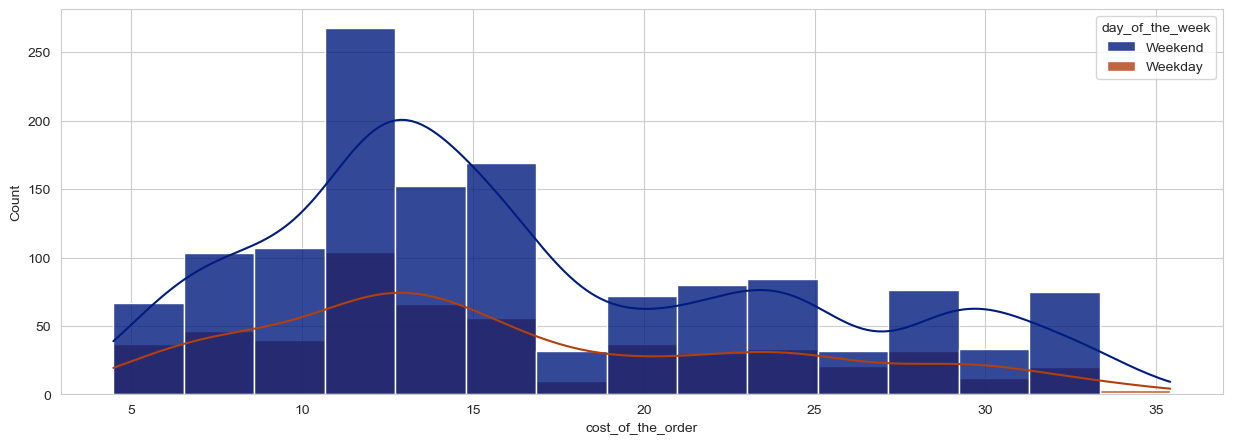

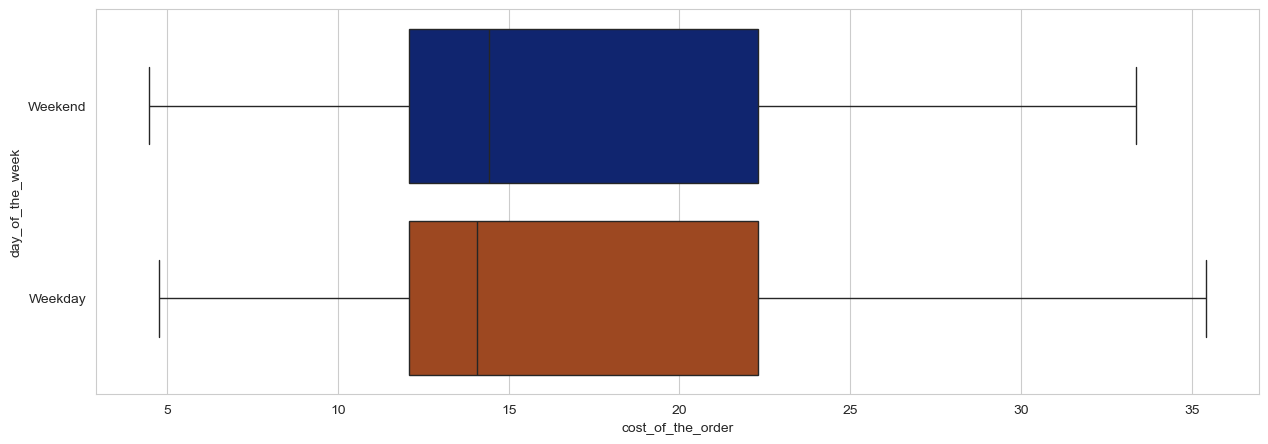

Median: 14.14


In [25]:
# Render histogram
plt.figure(figsize=(15,5))
ax = sns.histplot(data=df, x='cost_of_the_order', hue="day_of_the_week", binwidth=2, kde=True, alpha=0.8,palette="dark")
plt.show()

# Render box plot
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='cost_of_the_order', y='day_of_the_week', palette="dark")
plt.show()

# Print median
print('Median:', df['cost_of_the_order'].median())

#### Remarks: 

Representations of the distribution of costs indicate right skewness and a multimodal distribution, with a maximum around 12 dollars, a peak around 25 dollars, then a drop and a peak again at 30 dollars. 

This suggests variations across other features, for example demographic or income-related, and an observation of correlation on these features is indicated. 

Known target markets include students and working professionals, and it would be good to identify features relevant to those markets that might correlate with the cost of orders.

### 6.2 Observation on cuisine types

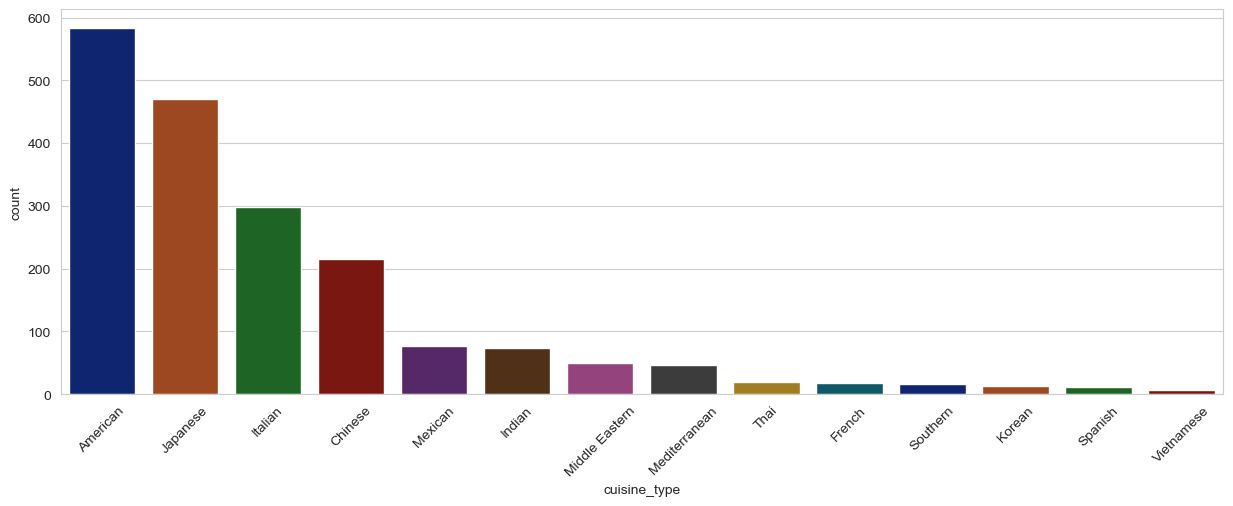

In [27]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df,x='cuisine_type',order = df['cuisine_type'].value_counts().index, palette="dark")

# Rotate x-axis ticks 
ax.tick_params(axis='x', rotation=45)

plt.show()

#### Remarks: 

The most popular cuisine types are American, Japanese, Italian and Chinese, followed by Mexican and Indian. Orders for these types of cuisine are significantly more frequent than for any other type, which might be taken into account when considering strategies for performance improvement. 

For example, a French restaurant might want to provide Italian or American alternatives on their menu in order to increase their sales.

### 6.3 Observation on rating

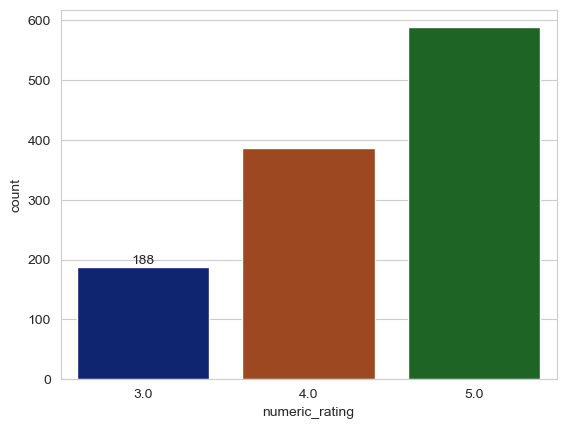

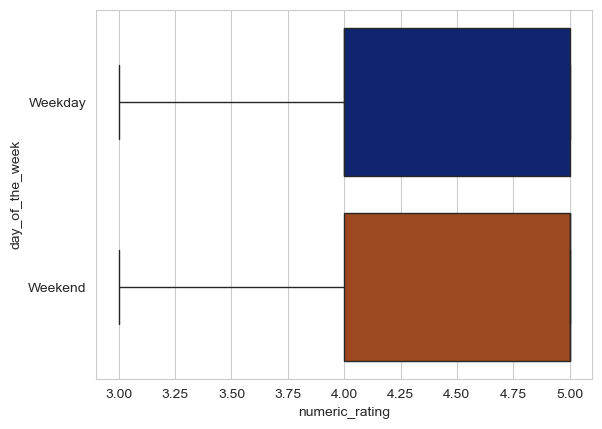

In [31]:
q6_3_df = df[df['numeric_rating']!= 0]

# Count plot
ax = sns.countplot(data = q6_3_df, x='numeric_rating', palette="dark")
# Display respective counts as bar labels
ax.bar_label(ax.containers[0])
plt.show()

# Box plot
sns.boxplot(data = q6_3_df, x='numeric_rating', y='day_of_the_week',palette="dark")
plt.show();

#### Remarks:
Ratings tend to be skewed toward five, with no ratings under 3. This could possibly indicate a courtesy bias, and should be considered when evaluating the significance of measurements.

### 6.4 Observation on food preparation time

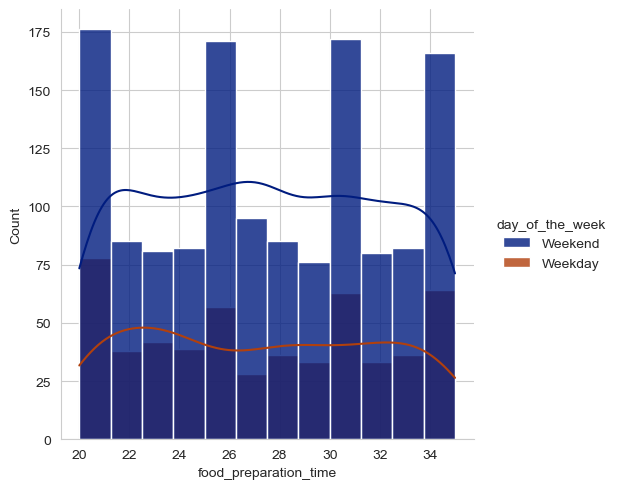

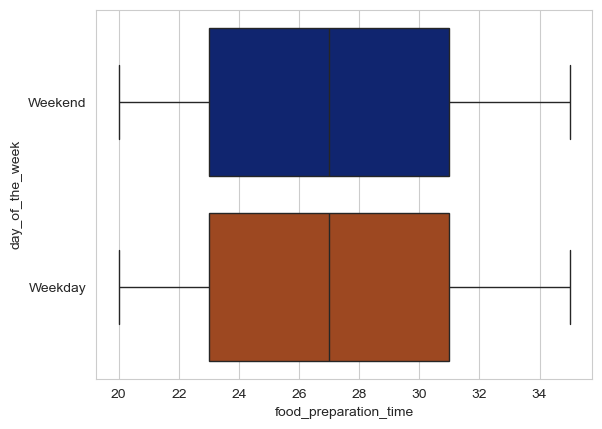

Median: 27.0
Standard deviation: 4.63


In [33]:
# Distplot overlay (by day of the week/hue)
dis1 = sns.displot(data = df, x='food_preparation_time', hue='day_of_the_week', kde=True, alpha=0.8,palette="dark")
plt.show()

# Box plot
sns.boxplot(data = df, x='food_preparation_time', y='day_of_the_week',palette="dark")
plt.show();

# Print median & standard deviation
print('Median:', round(df['food_preparation_time'].median(), 2))
print('Standard deviation:', round(df['food_preparation_time'].std(), 2))

#### Remarks:
Trends in food preparation time are similar across weekdays and weekends, with a relatively balanced distribution around the median, at 27 minutes, and high variability. This could be due to inherent variability in foods cooking time.

### 6.5 Observation on delivery time

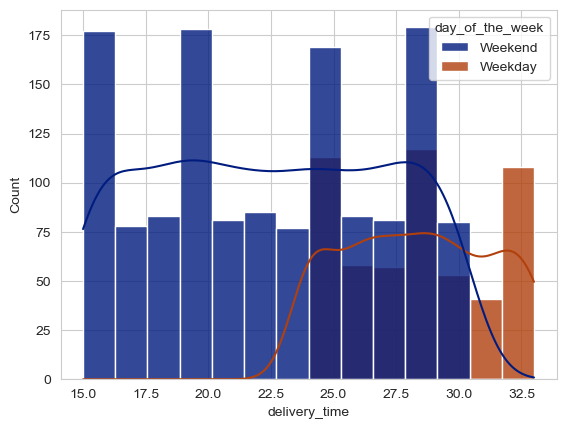

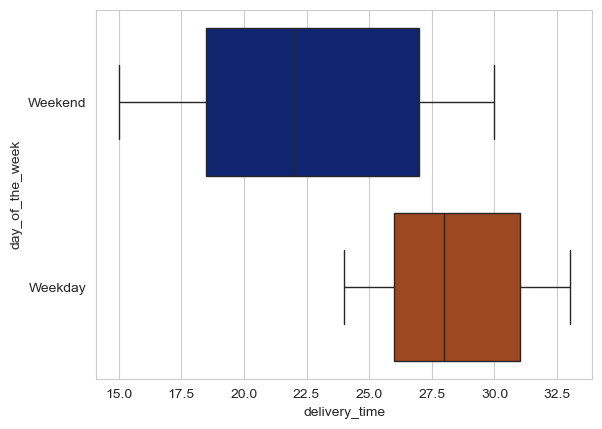

Median: 25.0
Standard deviation: 4.97


In [35]:
# Histogram overlay (by day of the week/hue)
dis2 = sns.histplot(x='delivery_time', data=df, hue='day_of_the_week', kde=True, alpha=0.8, palette="dark")
plt.show()

# Box plot
sns.boxplot(data = df, x='delivery_time', y='day_of_the_week', palette="dark")
plt.show();

# Print median & standard deviation
print('Median:', round(df['delivery_time'].median(), 2))
print('Standard deviation:', round(df['delivery_time'].std(), 2))

#### Remarks:
Here, delivery times are remarkably longer during weekdays than on weekends. This is discussed further at question 16, and could indicate differing traffic conditions. It could also indicate a potential area of improvement, for example through careful planning or additional staffing during weekdays.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

In [37]:
order_counts = df.groupby(['restaurant_name'], as_index=False)['order_id']\
.count()\
.sort_values(by=['order_id'], ascending=False)\
.rename(columns = {'order_id':'order_count'})\
.reset_index()

# Pad index to one, for English language readability
order_counts.index = order_counts.index + 1

display(order_counts.head())

,index,restaurant_name,order_count
1,136,Shake Shack,219
2,153,The Meatball Shop,132
3,21,Blue Ribbon Sushi,119
4,20,Blue Ribbon Fried Chicken,96
5,109,Parm,68


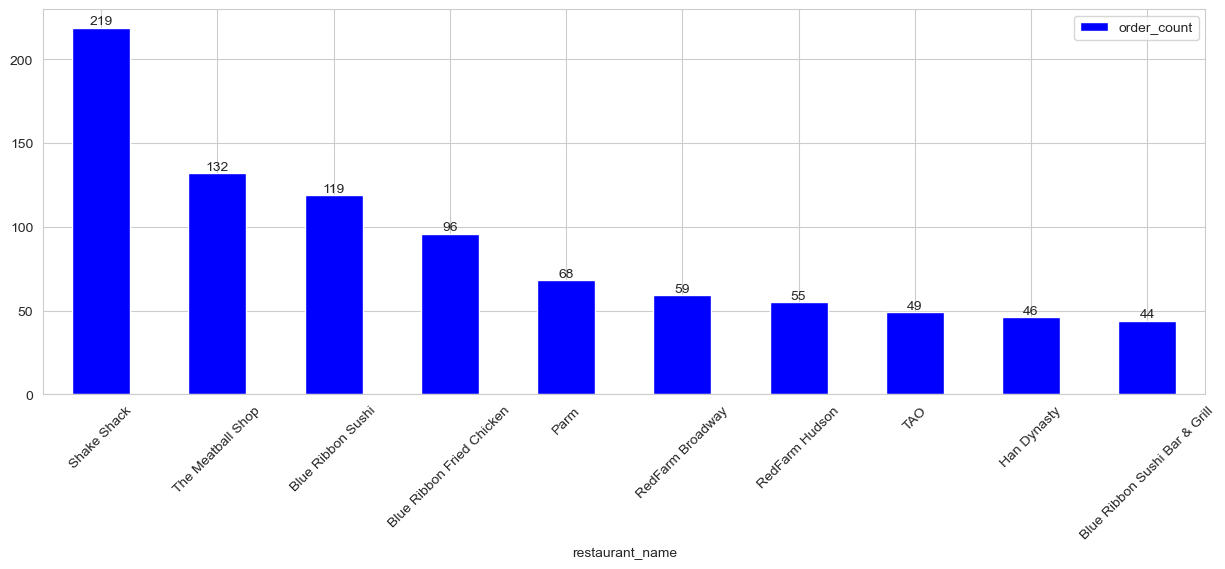

In [49]:
# Plot top ten entries for additional visibility
ax = order_counts.head(10).plot(x='restaurant_name', y='order_count', kind='bar', figsize=(15,5), color="blue")
ax.tick_params(axis='x', rotation=45)

# Display respective counts as bar labels
ax.bar_label(ax.containers[0])

plt.show()

#### Observations:
There is a strong skew toward the top five restaurants listed above (**Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken** and **Parm**, from the most orders to the least), with *33.4% of all orders divided among them*. This could indicate a type of cultural bias, which is discussed as part of the conclusions and comments.

### **Question 8**: Which is the most popular cuisine on weekends?

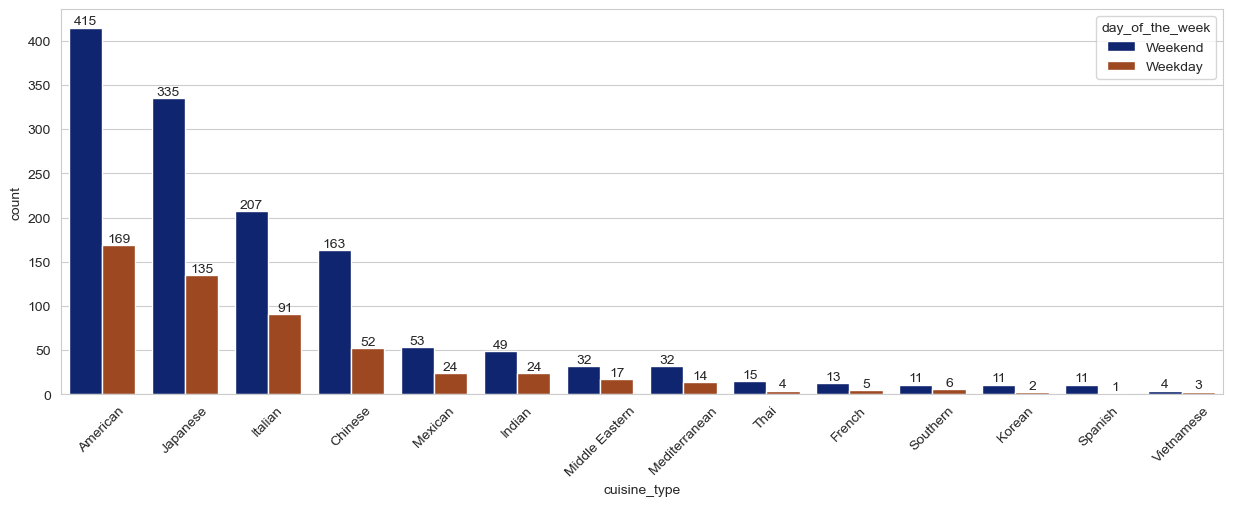

In [51]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index, hue='day_of_the_week', palette="dark")
ax.tick_params(axis='x', rotation=45)

# Display respective counts as bar labels for both hues
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

#### Observations:
**American cuisine** is the most popular on weekends, with general trends consistent with weekdays, but a significantly higher number of orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [54]:
percent_orders_over_20 = len(df[df['cost_of_the_order'] > 20])/len(df)

# Conversion from .2f representation
print("%2.2f%% of all orders cost more than 20 dollars." % (percent_orders_over_20 * 100))

29.24% of all orders cost more than 20 dollars.


#### Observations:
**29.24%** of all orders cost more than 20 dollars. By contrast, a significant majority of orders currently cost less than 20 dollars. Given additional demographic data, it might be interesting to factor this in as part of marketing planning.

### **Question 10**: What is the mean order delivery time?

In [57]:
order_delivery_mean = round(df['delivery_time'].mean(), 2)
order_delivery_std = round(df['delivery_time'].std(), 2)

order_delivery_ratio = order_delivery_std / order_delivery_mean

print('Order delivery mean time:', order_delivery_mean)
print('Standard deviation:', order_delivery_std)
print('Coefficient of variation (CV):', "%2.2f%%" % (order_delivery_ratio * 100))

Order delivery mean time: 24.16
Standard deviation: 4.97
Coefficient of variation (CV): 20.57%


#### Observations:
**24.16 minutes** is the mean order delivery time. However, the standard deviation seems elevated with a 20.57% CV, indicating a fair degree of variability.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [60]:
q11_result = df[['order_id', 'customer_id']]\
.groupby(['customer_id'], as_index=False)\
.count()\
.sort_values(by = 'order_id', ascending=False)\
.rename(columns = {'order_id':'order_count'})\
.reset_index()\
.head(3)

display(q11_result)

,index,customer_id,order_count
0,116,52832,13
1,84,47440,10
2,333,83287,9


#### Observations:
**Customers 52832, 47440** and **83287** have placed 13, 10 and 9 orders respectively, which makes them the top three most frequent customers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset.


### 12.1: Correlation Matrix

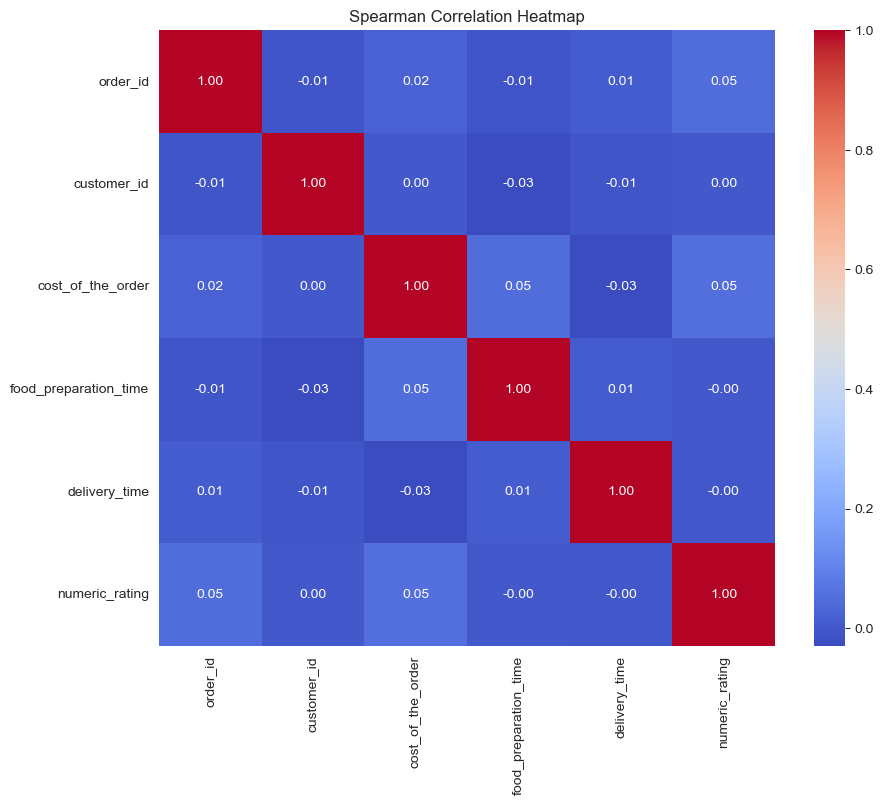

In [62]:
# Create a copy of the DataFrame for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate Spearman correlation on the numeric data
spearman_corr = numeric_df.corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Spearman Correlation Heatmap")
plt.show()



#### Observations:
The correlation matrix, rendered as a heatmap, shows weak correlation between variables overall. 

Spearman's rank is used here as the corrrelation method, in order to better identify potential relationships between quantitative and qualitative variables. Sources suggesting this method and discussing its advantages include the [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html), and websites about statistical science such as [All Things Statistics](https://allthingsstatistics.com/miscellaneous/spearman-rank-correlation-coefficient-advantages-disadvantages/).

(*) Subsequent results are presented from the most frequently ordered cuisine type to the least frequently ordered.

### 12.2 Cost of order according to cuisine type

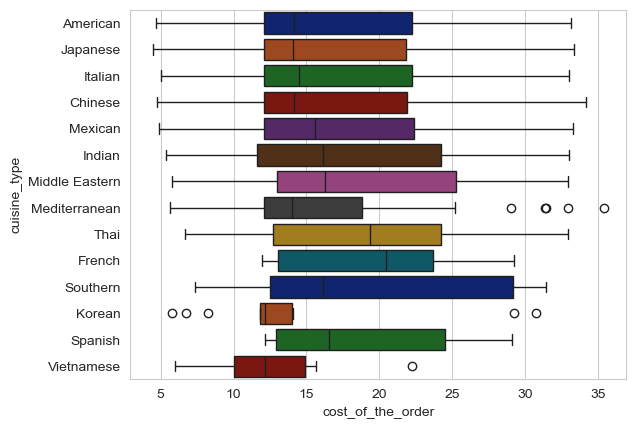

In [69]:
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type', order=df['cuisine_type'].value_counts().index, palette="dark")
plt.show()


#### Observations:
Most frequently ordered cuisine types present consistent spreads among them, suggesting for example that **cost and cost spread could be a factor in their popularity.**

Remarkably, some less frequently ordered cuisine types tend to present notably lower or higher costs and cost spreads. 

It is possible that the cost range of the top performing cuisine types could convey adequate or preferred value to customers, and more research is indicated.

### 12.3 Ratings according to cuisine type

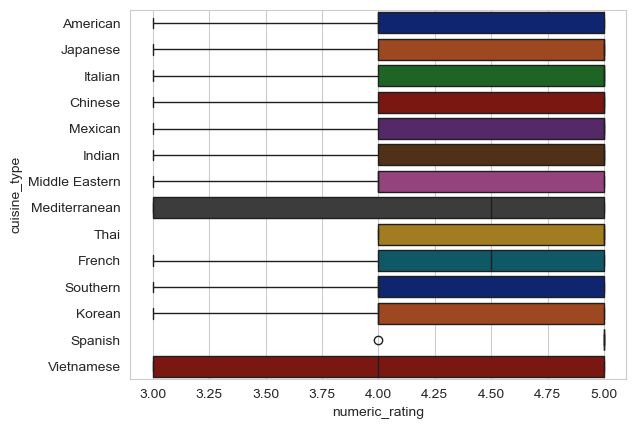

In [73]:
sns.boxplot(data=df[df['numeric_rating']!=0],x='numeric_rating',y='cuisine_type', order=df['cuisine_type'].value_counts().index, palette="dark")
plt.show()

#### Observations:
Mediterranean and Vietnamese cuisine types, some of those with the lowest average prices, are the only ones to receive ratings below 4. This could suggest a correlation between cost and perceived value. Ie. lower costs could convey inadequate value, and be subject to steeper criticism as a result.

No conclusion can be drawn however, and more research is indicated.

### 12.4 Preparation time according to cuisine type

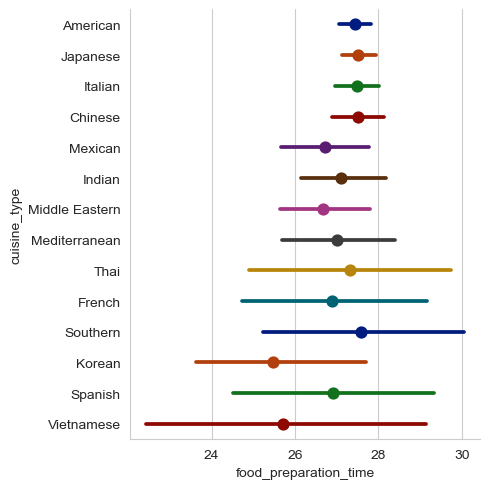

In [75]:
sns.catplot(data=df, x='food_preparation_time', y='cuisine_type', kind='point', order=df['cuisine_type'].value_counts().index, palette="dark")
plt.show()

#### Observations:
Some of the most popular food types present strong consistency between their preparation times, suggesting that this also could be a factor in their popularity. Again here, more research is indicated.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [77]:
# Exclude entries with no ratings from both frames
with_ratings = df[df['numeric_rating']!= 0]

# Create a dataframe matching condition one
with_cond_1 = with_ratings[['restaurant_name','numeric_rating']]\
.groupby('restaurant_name')\
.count() > 50

with_cond_1['count'] = with_ratings.groupby('restaurant_name')['numeric_rating'].count()

# Create a dataframe matching condition two
with_cond_2 = with_ratings[['restaurant_name','numeric_rating']]\
.groupby('restaurant_name')\
.mean() > 4

with_cond_2['mean'] = with_ratings.groupby('restaurant_name')['numeric_rating'].mean()

# Intersect (merge) the resulting data frames on the restaurant name
q13_result = pd\
.merge(with_cond_1[with_cond_1['numeric_rating']], with_cond_2[with_cond_2['numeric_rating']],on ='restaurant_name')\
.rename(columns = {'numeric_rating_x':'more_than_50_ratings', 'numeric_rating_y': 'greater_than_four_average'})

# Present
display(q13_result[['count', 'mean', 'more_than_50_ratings', 'greater_than_four_average']].sort_values(by='count', ascending=False))

,count,mean,more_than_50_ratings,greater_than_four_average
restaurant_name,,,,
Shake Shack,133,4.278195,True,True
The Meatball Shop,84,4.511905,True,True
Blue Ribbon Sushi,73,4.219178,True,True
Blue Ribbon Fried Chicken,64,4.328125,True,True


#### Observations:
**Shake Shack, The Meatball Shop, Blue Ribbo Sushi** and **Blue Ribbon Fried Chicken** all qualify for the promotion.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [81]:
sum_orders_over_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum()
sum_orders_over_5 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum()

print(sum_orders_over_20 * 0.25 + sum_orders_over_5 * 0.15)

6166.303


#### Observations:
The net revenue is **$6166.303** across all orders.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [1 marks]

In [85]:
count_deliveries_over_60_minutes = len(df[df['food_preparation_time'] + df['delivery_time']>60])

print(round(count_deliveries_over_60_minutes/len(df)*100, 2))

10.54


#### Observations:
**~10.54% of all orders** take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [89]:
q16_result = df.groupby('day_of_the_week')['delivery_time'].agg(['mean','count','std'])
display(q16_result)

,mean,count,std
day_of_the_week,,,
Weekday,28.340037,547,2.891428
Weekend,22.470022,1351,4.628938


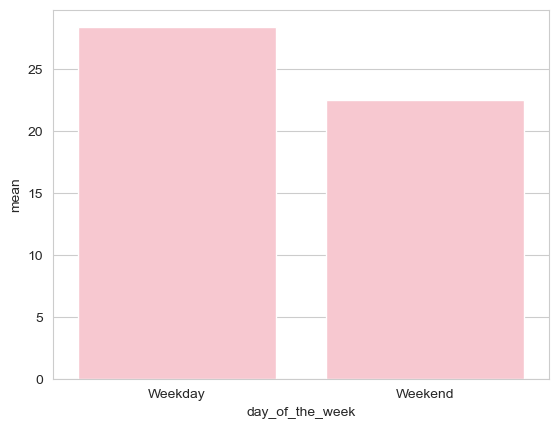

In [93]:
sns.barplot(data=q16_result,y='mean',x=q16_result.index, color="pink")

plt.show()

#### Observations:

Mean time of delivery is markedly shorter on weekends, however it is also subject to greater variability. This is particularly interesting in relation to the number of orders, which is significantly higher during weekends. This might suggest worse traffic conditions during weekdays, but greater predictability.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

### Conclusions:
1. The significance of feedback ratings is unclear. 
  * A high rate of missing feedback (39%) might introduce bias.
  * Some missing feedback could indicate discontent
  * Mid-range feedback could also indicate discontent due to courtesy bias.
<br/><br/>
3. Sentimental factors seem to influence choice, with familiar or globally visible cuisine types being selected prominently (in order American, Japanese, Italian and Chinese).
<br/><br/>
4. Another sentimental factor could include the perceived connection of cost to value.
<br/><br/>
5. Target demographics also require more research in order to better interpret cost variations, and establish correlation between the cost of orders and specific features.
<br/><br/>
6. Predictability and consistency of the delivery times could also influence the perceived value of the service.

### Recommendations:

1. Focus on **gathering additional or clearer feedback from customers**. For example:
  * By using incentives for feedback ratings.
  * By conducting or integrating follow-up surveys in the usage flow.
<br/><br/>
2. More research into **customer demographics and market segmentation** can higlight areas of opportunity, and help to identify the causes of a multimodal distribution of costs. Ie. 
  * Identifying which market segments and demographic features correlate with maximums and minimums in the distribution of costs.
  * Targeting advertising and pricing accordingly.
<br/><br/>
3. Another area of improvement could lie in **reducing the total time to delivery** during weekdays, and the variability of delivery times, in particular during weekends.
<br/><br/>
4. Research is also indicated into **sentiment**:
  * Cultural in terms of the perception of certain types of cuisines.
  * Regarding whether the predictability of delivery times affects perceived value/customer satisfaction.
  * Regarding the perceived relationship between the **price and value** of goods.
<br/><br/>
5. This could be used to:

  * Adjust pricing strategies.
  * Extend the menu of restaurants with low-performing cuisine types, either through hybridation, or by offering alternative foods from popular types.
  * Through targeted advertising, in order to render less popular cuisine more visible and more familiar to the public.
  